In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_context("talk", font_scale=1.2)

In [9]:
ortho_table_dir = '/Volumes/Data/kim_lab/ortho/sekected/'
fl = [i for i in os.listdir(ortho_table_dir) if 'select' in i]
print(fl)

['cricetulus_griseus_crigri.select.tsv', 'mesocricetus_auratus.select.tsv', 'microtus_ochrogaster.select.tsv', 'mus_musculus.select.tsv', 'mus_pahari.select.tsv', 'nannospalax_galili.select.tsv', 'peromyscus_maniculatus_bairdii.select.tsv', 'rattus_norvegicus.select.tsv']


In [10]:
dfs = [pd.read_table(ortho_table_dir + i) for i in fl]

In [12]:
new_dfs = [dfs[0].iloc[:, list(range(0, 13))]]
for df in dfs:
    sdf = df.iloc[:, list(range(13, len(df.columns)))]
    new_dfs.append(sdf)
total_df = pd.concat(new_dfs, axis=1)
total_df.to_csv('/Volumes/Data/kim_lab/ortho/ortho_total.tsv', sep='\t', index=False)

In [13]:
total_df.shape

(24433, 141)

In [14]:
tl = total_df.columns.tolist()
print('\n'.join(tl))

Gene stable ID
Transcript stable ID
Protein stable ID
Chromosome/scaffold name
Gene start (bp)
Gene end (bp)
Strand
Karyotype band
Gene name
Source of gene name
Transcript count
Gene % GC content
Gene description
Chinese hamster CriGri gene stable ID
Chinese hamster CriGri gene name
Chinese hamster CriGri protein or transcript stable ID
Chinese hamster CriGri chromosome/scaffold name
Chinese hamster CriGri chromosome/scaffold start (bp)
Chinese hamster CriGri chromosome/scaffold end (bp)
Query protein or transcript ID
Last common ancestor with Chinese hamster CriGri
Chinese hamster CriGri homology type
%id. target Chinese hamster CriGri gene identical to query gene
%id. query gene identical to target Chinese hamster CriGri gene
Chinese hamster CriGri Gene-order conservation score
Chinese hamster CriGri Whole-genome alignment coverage
dN with Chinese hamster CriGri
dS with Chinese hamster CriGri
Chinese hamster CriGri orthology confidence [0 low, 1 high]
Golden Hamster gene stable ID
Go

In [33]:
total_coding_df = total_df[total_df['Protein stable ID'].notnull()]

Int64Index([    5,     9,    15,    18,    20,    21,    22,    24,    26,
               27,
            ...
            24423, 24424, 24425, 24426, 24427, 24428, 24429, 24430, 24431,
            24432],
           dtype='int64', length=17845)


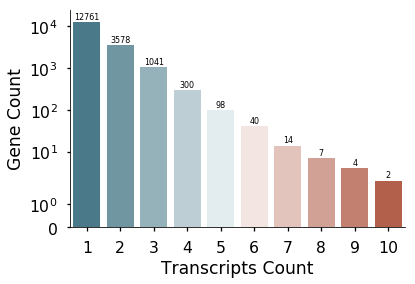

In [16]:
transcript_counts = total_coding_df['Transcript count'].value_counts()
ax = sns.barplot(x=transcript_counts.index, y=transcript_counts,
                 palette=sns.diverging_palette(220, 20, n=10))
ax.set_yscale('symlog')
ax.set_ylabel('Gene Count')
ax.set_ylim(0, 25000)
ax.set_xlabel('Transcripts Count')
for idx, count in transcript_counts.iteritems():
    ax.text(idx-1, count*1.2, count, color='black', ha="center", fontsize=8)
sns.despine()
plt.show()

In [39]:
# save idonly table
total_coding_df_change_column = total_coding_df
total_coding_df_change_column.columns = ['Gene stable ID', 'Transcript stable ID', 'Protein stable ID', 'Chromosome/scaffold name', 'Gene start (bp)', 'Gene end (bp)', 'Strand', 'Karyotype band', 'Gene name', 'Source of gene name', 'Transcript count', 'Gene % GC content', 'Gene description', 'Chinese hamster CriGri gene stable ID', 'Chinese hamster CriGri gene name', 'Chinese hamster CriGri protein or transcript stable ID', 'Chinese hamster CriGri chromosome/scaffold name', 'Chinese hamster CriGri chromosome/scaffold start (bp)', 'Chinese hamster CriGri chromosome/scaffold end (bp)', 'Chinese hamster Query protein or transcript ID', 'Last common ancestor with Chinese hamster CriGri', 'Chinese hamster CriGri homology type', '%id. target Chinese hamster CriGri gene identical to query gene', '%id. query gene identical to target Chinese hamster CriGri gene', 'Chinese hamster CriGri Gene-order conservation score', 'Chinese hamster CriGri Whole-genome alignment coverage', 'dN with Chinese hamster CriGri', 'dS with Chinese hamster CriGri', 'Chinese hamster CriGri orthology confidence [0 low, 1 high]', 'Golden Hamster gene stable ID', 'Golden Hamster gene name', 'Golden Hamster protein or transcript stable ID', 'Golden Hamster chromosome/scaffold name', 'Golden Hamster chromosome/scaffold start (bp)', 'Golden Hamster chromosome/scaffold end (bp)', 'Golden Hamster Query protein or transcript ID', 'Last common ancestor with Golden Hamster', 'Golden Hamster homology type', '%id. target Golden Hamster gene identical to query gene', '%id. query gene identical to target Golden Hamster gene', 'Golden Hamster Gene-order conservation score', 'Golden Hamster Whole-genome alignment coverage', 'dN with Golden Hamster', 'dS with Golden Hamster', 'Golden Hamster orthology confidence [0 low, 1 high]', 'Prairie vole gene stable ID', 'Prairie vole gene name', 'Prairie vole protein or transcript stable ID', 'Prairie vole chromosome/scaffold name', 'Prairie vole chromosome/scaffold start (bp)', 'Prairie vole chromosome/scaffold end (bp)', 'Query protein or transcript ID', 'Last common ancestor with Prairie vole', 'Prairie vole homology type', '%id. target Prairie vole gene identical to query gene', '%id. query gene identical to target Prairie vole gene', 'Prairie vole Gene-order conservation score', 'Prairie vole Whole-genome alignment coverage', 'dN with Prairie vole', 'dS with Prairie vole', 'Prairie vole orthology confidence [0 low, 1 high]', 'Mouse gene stable ID', 'Mouse gene name', 'Mouse protein or transcript stable ID', 'Mouse chromosome/scaffold name', 'Mouse chromosome/scaffold start (bp)', 'Mouse chromosome/scaffold end (bp)', 'Mouse Query protein or transcript ID', 'Last common ancestor with Mouse', 'Mouse homology type', '%id. target Mouse gene identical to query gene', '%id. query gene identical to target Mouse gene', 'Mouse Gene-order conservation score', 'Mouse Whole-genome alignment coverage', 'dN with Mouse', 'dS with Mouse', 'Mouse orthology confidence [0 low, 1 high]', 'Shrew mouse gene stable ID', 'Shrew mouse gene name', 'Shrew mouse protein or transcript stable ID', 'Shrew mouse chromosome/scaffold name', 'Shrew mouse chromosome/scaffold start (bp)', 'Shrew mouse chromosome/scaffold end (bp)', 'Shrew mouse Query protein or transcript ID', 'Last common ancestor with Shrew mouse', 'Shrew mouse homology type', '%id. target Shrew mouse gene identical to query gene', '%id. query gene identical to target Shrew mouse gene', 'Shrew mouse Gene-order conservation score', 'Shrew mouse Whole-genome alignment coverage', 'dN with Shrew mouse', 'dS with Shrew mouse', 'Shrew mouse orthology confidence [0 low, 1 high]', 'Upper Galilee mountains blind mole rat gene stable ID', 'Upper Galilee mountains blind mole rat gene name', 'Upper Galilee mountains blind mole rat protein or transcript stable ID', 'Upper Galilee mountains blind mole rat chromosome/scaffold name', 'Upper Galilee mountains blind mole rat chromosome/scaffold start (bp)', 'Upper Galilee mountains blind mole rat chromosome/scaffold end (bp)', 'Upper Galilee Query protein or transcript ID', 'Last common ancestor with Upper Galilee mountains blind mole rat', 'Upper Galilee mountains blind mole rat homology type', '%id. target Upper Galilee mountains blind mole rat gene identical to query gene', '%id. query gene identical to target Upper Galilee mountains blind mole rat gene', 'Upper Galilee mountains blind mole rat Gene-order conservation score', 'Upper Galilee mountains blind mole rat Whole-genome alignment coverage', 'dN with Upper Galilee mountains blind mole rat', 'dS with Upper Galilee mountains blind mole rat', 'Upper Galilee mountains blind mole rat orthology confidence [0 low, 1 high]', 'Northern American deer mouse gene stable ID', 'Northern American deer mouse gene name', 'Northern American deer mouse protein or transcript stable ID', 'Northern American deer mouse chromosome/scaffold name', 'Northern American deer mouse chromosome/scaffold start (bp)', 'Northern American deer mouse chromosome/scaffold end (bp)', 'Northern American deer mouse Query protein or transcript ID', 'Last common ancestor with Northern American deer mouse', 'Northern American deer mouse homology type', '%id. target Northern American deer mouse gene identical to query gene', '%id. query gene identical to target Northern American deer mouse gene', 'Northern American deer mouse Gene-order conservation score', 'Northern American deer mouse Whole-genome alignment coverage', 'dN with Northern American deer mouse', 'dS with Northern American deer mouse', 'Northern American deer mouse orthology confidence [0 low, 1 high]', 'Rat gene stable ID', 'Rat gene name', 'Rat protein or transcript stable ID', 'Rat chromosome/scaffold name', 'Rat chromosome/scaffold start (bp)', 'Rat chromosome/scaffold end (bp)', 'Rat Query protein or transcript ID', 'Last common ancestor with Rat', 'Rat homology type', '%id. target Rat gene identical to query gene', '%id. query gene identical to target Rat gene', 'Rat Gene-order conservation score', 'Rat Whole-genome alignment coverage', 'dN with Rat', 'dS with Rat', 'Rat orthology confidence [0 low, 1 high]']
total_coding_ortho_gene_id_df = total_coding_df_change_column.filter(regex=("gene stable ID|Protein stable ID|protein or transcript stable ID|Query protein or transcript ID"), axis=1)
total_coding_ortho_gene_id_df.set_index(total_coding_df['Gene stable ID'], inplace=True)
total_coding_ortho_gene_id_df.to_csv('/Volumes/Data/kim_lab/ortho/ortho_total_idonly.tsv', sep='\t')

Index(['ENSJJAG00000000006', 'ENSJJAG00000000010', 'ENSJJAG00000000016',
       'ENSJJAG00000000019', 'ENSJJAG00000000021', 'ENSJJAG00000000022',
       'ENSJJAG00000000023', 'ENSJJAG00000000025', 'ENSJJAG00000000027',
       'ENSJJAG00000000028',
       ...
       'ENSJJAG00000024425', 'ENSJJAG00000024426', 'ENSJJAG00000024427',
       'ENSJJAG00000024428', 'ENSJJAG00000024429', 'ENSJJAG00000024430',
       'ENSJJAG00000024431', 'ENSJJAG00000024432', 'ENSJJAG00000024433',
       'ENSJJAG00000024434'],
      dtype='object', name='Gene stable ID', length=17845)


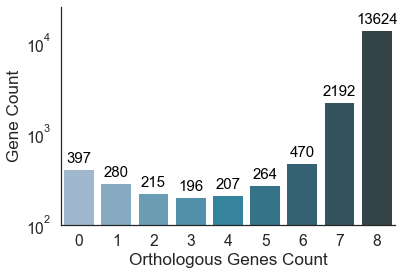

In [37]:
sns.set_context("talk", font_scale=1.2)
total_coding_df_change_column = total_coding_df
total_coding_df_change_column.columns = ['Gene stable ID', 'Transcript stable ID', 'Protein stable ID', 'Chromosome/scaffold name', 'Gene start (bp)', 'Gene end (bp)', 'Strand', 'Karyotype band', 'Gene name', 'Source of gene name', 'Transcript count', 'Gene % GC content', 'Gene description', 'Chinese hamster CriGri gene stable ID', 'Chinese hamster CriGri gene name', 'Chinese hamster CriGri protein or transcript stable ID', 'Chinese hamster CriGri chromosome/scaffold name', 'Chinese hamster CriGri chromosome/scaffold start (bp)', 'Chinese hamster CriGri chromosome/scaffold end (bp)', 'Chinese hamster Query protein or transcript ID', 'Last common ancestor with Chinese hamster CriGri', 'Chinese hamster CriGri homology type', '%id. target Chinese hamster CriGri gene identical to query gene', '%id. query gene identical to target Chinese hamster CriGri gene', 'Chinese hamster CriGri Gene-order conservation score', 'Chinese hamster CriGri Whole-genome alignment coverage', 'dN with Chinese hamster CriGri', 'dS with Chinese hamster CriGri', 'Chinese hamster CriGri orthology confidence [0 low, 1 high]', 'Golden Hamster gene stable ID', 'Golden Hamster gene name', 'Golden Hamster protein or transcript stable ID', 'Golden Hamster chromosome/scaffold name', 'Golden Hamster chromosome/scaffold start (bp)', 'Golden Hamster chromosome/scaffold end (bp)', 'Golden Hamster Query protein or transcript ID', 'Last common ancestor with Golden Hamster', 'Golden Hamster homology type', '%id. target Golden Hamster gene identical to query gene', '%id. query gene identical to target Golden Hamster gene', 'Golden Hamster Gene-order conservation score', 'Golden Hamster Whole-genome alignment coverage', 'dN with Golden Hamster', 'dS with Golden Hamster', 'Golden Hamster orthology confidence [0 low, 1 high]', 'Prairie vole gene stable ID', 'Prairie vole gene name', 'Prairie vole protein or transcript stable ID', 'Prairie vole chromosome/scaffold name', 'Prairie vole chromosome/scaffold start (bp)', 'Prairie vole chromosome/scaffold end (bp)', 'Query protein or transcript ID', 'Last common ancestor with Prairie vole', 'Prairie vole homology type', '%id. target Prairie vole gene identical to query gene', '%id. query gene identical to target Prairie vole gene', 'Prairie vole Gene-order conservation score', 'Prairie vole Whole-genome alignment coverage', 'dN with Prairie vole', 'dS with Prairie vole', 'Prairie vole orthology confidence [0 low, 1 high]', 'Mouse gene stable ID', 'Mouse gene name', 'Mouse protein or transcript stable ID', 'Mouse chromosome/scaffold name', 'Mouse chromosome/scaffold start (bp)', 'Mouse chromosome/scaffold end (bp)', 'Mouse Query protein or transcript ID', 'Last common ancestor with Mouse', 'Mouse homology type', '%id. target Mouse gene identical to query gene', '%id. query gene identical to target Mouse gene', 'Mouse Gene-order conservation score', 'Mouse Whole-genome alignment coverage', 'dN with Mouse', 'dS with Mouse', 'Mouse orthology confidence [0 low, 1 high]', 'Shrew mouse gene stable ID', 'Shrew mouse gene name', 'Shrew mouse protein or transcript stable ID', 'Shrew mouse chromosome/scaffold name', 'Shrew mouse chromosome/scaffold start (bp)', 'Shrew mouse chromosome/scaffold end (bp)', 'Shrew mouse Query protein or transcript ID', 'Last common ancestor with Shrew mouse', 'Shrew mouse homology type', '%id. target Shrew mouse gene identical to query gene', '%id. query gene identical to target Shrew mouse gene', 'Shrew mouse Gene-order conservation score', 'Shrew mouse Whole-genome alignment coverage', 'dN with Shrew mouse', 'dS with Shrew mouse', 'Shrew mouse orthology confidence [0 low, 1 high]', 'Upper Galilee mountains blind mole rat gene stable ID', 'Upper Galilee mountains blind mole rat gene name', 'Upper Galilee mountains blind mole rat protein or transcript stable ID', 'Upper Galilee mountains blind mole rat chromosome/scaffold name', 'Upper Galilee mountains blind mole rat chromosome/scaffold start (bp)', 'Upper Galilee mountains blind mole rat chromosome/scaffold end (bp)', 'Upper Galilee Query protein or transcript ID', 'Last common ancestor with Upper Galilee mountains blind mole rat', 'Upper Galilee mountains blind mole rat homology type', '%id. target Upper Galilee mountains blind mole rat gene identical to query gene', '%id. query gene identical to target Upper Galilee mountains blind mole rat gene', 'Upper Galilee mountains blind mole rat Gene-order conservation score', 'Upper Galilee mountains blind mole rat Whole-genome alignment coverage', 'dN with Upper Galilee mountains blind mole rat', 'dS with Upper Galilee mountains blind mole rat', 'Upper Galilee mountains blind mole rat orthology confidence [0 low, 1 high]', 'Northern American deer mouse gene stable ID', 'Northern American deer mouse gene name', 'Northern American deer mouse protein or transcript stable ID', 'Northern American deer mouse chromosome/scaffold name', 'Northern American deer mouse chromosome/scaffold start (bp)', 'Northern American deer mouse chromosome/scaffold end (bp)', 'Northern American deer mouse Query protein or transcript ID', 'Last common ancestor with Northern American deer mouse', 'Northern American deer mouse homology type', '%id. target Northern American deer mouse gene identical to query gene', '%id. query gene identical to target Northern American deer mouse gene', 'Northern American deer mouse Gene-order conservation score', 'Northern American deer mouse Whole-genome alignment coverage', 'dN with Northern American deer mouse', 'dS with Northern American deer mouse', 'Northern American deer mouse orthology confidence [0 low, 1 high]', 'Rat gene stable ID', 'Rat gene name', 'Rat protein or transcript stable ID', 'Rat chromosome/scaffold name', 'Rat chromosome/scaffold start (bp)', 'Rat chromosome/scaffold end (bp)', 'Rat Query protein or transcript ID', 'Last common ancestor with Rat', 'Rat homology type', '%id. target Rat gene identical to query gene', '%id. query gene identical to target Rat gene', 'Rat Gene-order conservation score', 'Rat Whole-genome alignment coverage', 'dN with Rat', 'dS with Rat', 'Rat orthology confidence [0 low, 1 high]']
total_coding_ortho_gene_id_df = total_coding_df_change_column.filter(regex=("gene stable ID"), axis=1)

ortho_counts = total_coding_ortho_gene_id_df.notnull().sum(axis=1).value_counts()
ax = sns.barplot(x=ortho_counts.index, y=ortho_counts,
                 palette=sns.color_palette("PuBuGn_d", n_colors=9)[::-1])
ax.set_yscale('symlog')
ax.set_ylabel('Gene Count')
ax.set_ylim(100, 25000)
ax.set_xlabel('Orthologous Genes Count')
for idx, count in ortho_counts.iteritems():
    ax.text(idx, count*1.2, count, color='black', ha="center", fontsize=15)
sns.despine()
plt.show()


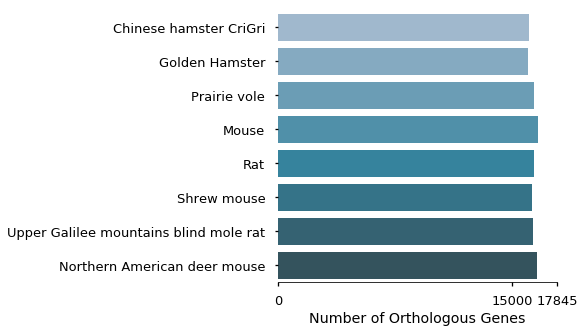

In [24]:
sns.set_context("talk", font_scale=1)
tx, ty = [], []
names = ['Chinese hamster CriGri', 'Golden Hamster', 'Prairie vole', 'Mouse', 'Rat', 'Shrew mouse', 
         'Upper Galilee mountains blind mole rat', 'Northern American deer mouse']
for name in names:
    x = total_coding_df['%id. target {} gene identical to query gene'.format(name)].dropna().tolist()
    y = [name] * len(x)
    tx += x
    ty += y
df = pd.DataFrame(dict(x=tx, g=ty))
species_ortho_counts = df['g'].value_counts()

fig = plt.gcf()
fig.set_size_inches(5, 5)
ax = sns.barplot(y=species_ortho_counts.index, x=species_ortho_counts,
                 palette=sns.color_palette("PuBuGn_d", n_colors=9)[::-1],
                 order=names)
ax.set_xlim(15000, 17000)
ax.set_xticks([0, 15000, 17845])
ax.set_xlabel('Number of Orthologous Genes')
sns.despine(left=True)
plt.show()

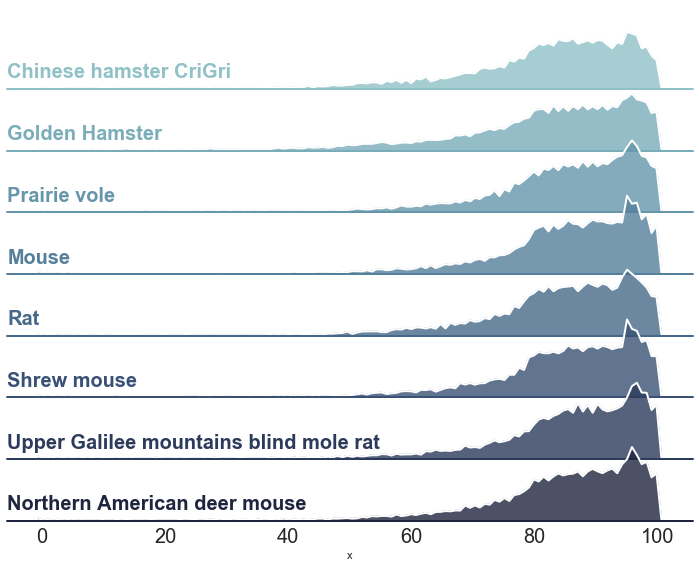

In [25]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
df = pd.DataFrame(dict(x=tx, g=ty))
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(8, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, size=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=0.8, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes, fontsize=20)
    ax.tick_params(labelsize=0)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xticks=[])

g.axes[-1][0].set_xticks([0, 20, 40, 60, 80, 100])
g.axes[-1][0].tick_params(labelsize=20)

g.despine(bottom=True, left=True)
plt.show()